In [172]:
# !user/bin/env/python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
import os
import warnings

os.chdir('E:/kaggle/House_Price')
warnings.filterwarnings('ignore')

In [231]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [185]:
missing_val = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val.loc[missing_val.sum(axis=1)>0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [186]:
def get_scores(y_true, y_pred):
    print('R2: ', r2_score(y_true, y_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))

In [187]:
def train_test(estimator, x_train, y_train, x_test, y_test):
    pred_train = estimator.predict(x_train)
    print(estimator)
    get_scores(y_train, pred_train)
    pred_test = estimator.predict(x_test)
    print(estimator)
    get_scores(y_test, pred_test)

In [232]:
train_labels = train.pop('SalePrice')
features = pd.concat([train, test], keys=['train', 'test'])
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
               axis=1, inplace=True)
features.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour LotConfig  ... FireplaceQu GarageType GarageFinish  \
train 0         Lvl    Inside  ...         NaN     Attchd          RFn   
      1         Lvl       FR2  ...          TA     Attchd          RFn   
      2         Lvl    Inside  ...          TA     Attchd          RFn   
      3         Lvl    Corner  ...          Gd     Detchd          Unf   
      4         Lvl       FR2  ...          TA     Attchd          RFn   

        GarageCars GarageQual PavedDrive  MoSold  YrSold  SaleType  \
train 0        2.0         TA          Y       2    2008        WD   
      1        2.0         TA          Y       5    2007        WD   
      2        2.0         TA          Y       9    2008        WD   
      3        3.0         TA          Y       2    2006        WD   
      4        3.0         TA          Y      12    2008        WD   

         SaleCondition  
train 0         Normal  
      1         Normal  
      2         Normal  
      3        Abnorml  
      4         Normal  

[5 rows x 56 columns]

In [233]:
features['MSSubClass'] = features.MSSubClass.astype(str)
features['MSZoning'] = features.MSZoning.fillna(features.MSZoning.mode()[0])
features['LotFrontage'] = features.LotFrontage.fillna(features.LotFrontage.mean())
features['Alley'] = features.Alley.fillna('NOACCESS')
features['OverallCond'] = features.OverallCond.astype(str)
features['MasVnrType'] = features.MasVnrType.fillna(features.MasVnrType.mode()[0])

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    features[col] = features[col].fillna('NOBSMT')

features['TotalBsmtSF'] = features.TotalBsmtSF.fillna(0)
features['Electrical'] = features.Electrical.fillna(features.Electrical.mode()[0])
features['KitchenAbvGr'] = features.KitchenAbvGr.astype(str)
features['KitchenQual'] = features.KitchenQual.fillna(features.KitchenQual.mode()[0])
features['FireplaceQu'] = features.FireplaceQu.fillna('NOFP')

for col in ['GarageType', 'GarageFinish', 'GarageQual']:
    features[col] = features[col].fillna('NOGRG')

features['GarageCars'] = features.GarageCars.fillna(0)
features['SaleType'] = features.SaleType.fillna(features.SaleType.mode()[0])
features['YrSold'] = features.YrSold.astype(str)
features['MoSold'] = features.MoSold.astype(str)
features['TotalSF'] = features.TotalBsmtSF + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

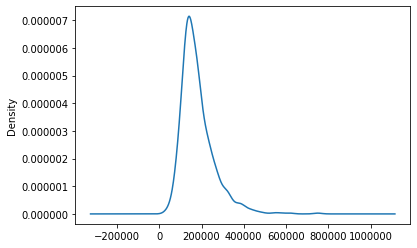

In [190]:
train_labels.plot(kind='density')

In [234]:
train_labels = np.log(train_labels)

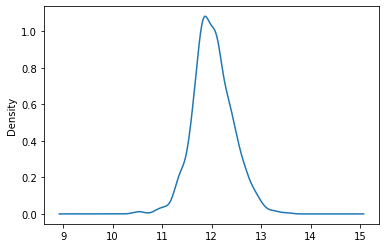

In [192]:
train_labels.plot(kind='density')

In [235]:
numeric_features = features[['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

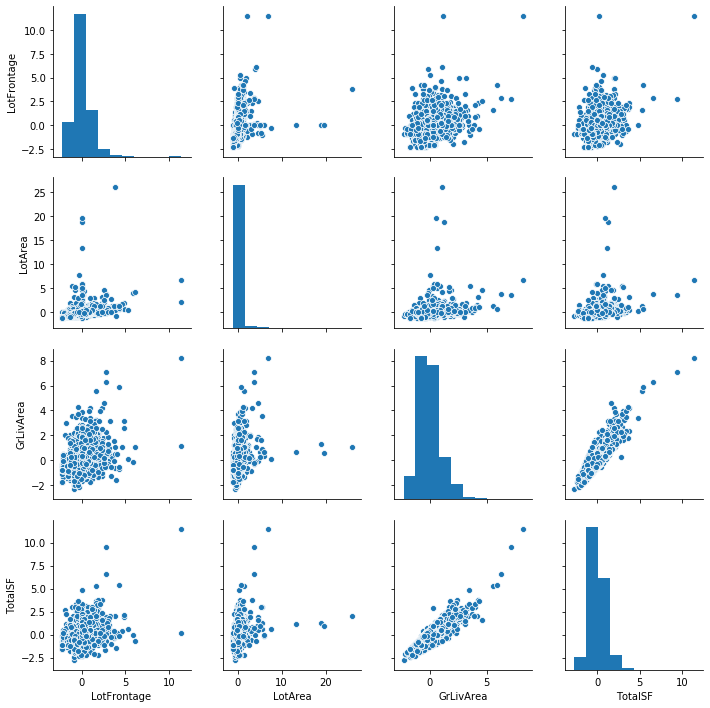

In [194]:
sns.pairplot(numeric_features_standardized)

In [236]:
conditions = set(features.Condition1.to_list() + features.Condition2.to_list())
dummies = pd.DataFrame(np.zeros((len(features.index), len(conditions))), columns=conditions)

for index, condition in enumerate(zip(features.Condition1, features.Condition2)):
    dummies.loc[index, condition] = 1

dummies.index = features.index
features = pd.concat([features, dummies.add_prefix('Condition_')], axis=1)
features.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

In [237]:
exteriors = set(features.Exterior1st.to_list() + features.Exterior2nd.to_list())
dummies = pd.DataFrame(np.zeros((len(features.index), len(exteriors))), columns=exteriors)

for index, exterior in enumerate(zip(features.Exterior1st, features.Exterior2nd)):
    dummies.loc[index, exterior] = 1

dummies.index = features.index
features = pd.concat([features, dummies.add_prefix('Exterior_')], axis=1)
features.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

In [238]:
for col in features.dtypes[features.dtypes == 'object'].index:
    features = pd.concat([features, pd.get_dummies(features[col], prefix=col)], axis=1)

In [239]:
features_standardized = features.copy()
features_standardized.update(numeric_features_standardized)

In [240]:
train_features = features.loc['train'].select_dtypes(include=np.number).drop('Id', axis=1).values
test_features = features.loc['test'].select_dtypes(include=np.number).drop('Id', axis=1).values

train_features_st = features_standardized.loc['train'].select_dtypes(include=np.number).drop('Id', axis=1).values
test_features_st = features_standardized.loc['test'].select_dtypes(include=np.number).drop('Id', axis=1).values

In [245]:
train_features, train_features_st, train_labels = shuffle(train_features_st, train_features, train_labels, random_state=5)
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

In [246]:
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                  l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000).fit(x_train_st, y_train_st)

In [247]:
train_test(EN, x_train_st, y_train_st, x_test_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
             cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2:  0.9122177105346909
RMSE:  0.11918137092423434
ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
             cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2:  0.9105142760956233
RMSE:  0.11088131867913636


In [248]:
scores_EN = cross_val_score(EN, train_features_st, train_labels, cv=5)
np.mean(scores_EN)

0.874794656797033

In [249]:
GB = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3,
                               max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
                               loss='huber').fit(x_train_st, y_train_st)

In [250]:
train_test(GB, x_train_st, y_train_st, x_test_st, y_test_st)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2:  0.9634602675662911
RMSE:  0.07689314182612245
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
  

In [251]:
scores_GB = cross_val_score(GB, train_features_st, train_labels)
np.mean(scores_GB)

0.892828892976533

In [252]:
GB_model = GB.fit(train_features_st, train_labels)
EN_model = EN.fit(train_features_st, train_labels)

In [253]:
final_result = (np.exp(GB_model.predict(test_features_st)) + np.exp(EN_model.predict(test_features_st)))/2

In [263]:
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = final_result
submission.to_csv('submission.csv', index=False)